In [151]:
#import de libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [152]:
#import de data
data = pd.read_csv('data/adult.csv')
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [153]:
#The column education is just a string representation of the column education-num. 
#We will drop the education column. But we keep new dataframe education.
education = pd.pivot_table(data, index='education', values = 'educational-num')
education

,educational-num
education,
10th,6
11th,7
12th,8
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
Assoc-acdm,12
Assoc-voc,11


In [154]:
#np.unique(data.workclass, return_counts = True)

In [155]:
data.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [156]:
#label encoder ?
data.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [157]:
#on se pose la question si on suprime ou pas la collone
data["capital-gain"].value_counts()


0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

In [158]:
#on se pose la question si on suprime ou pas la collone
data["capital-loss"].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

In [159]:
#pas de data manquant
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Visualisation

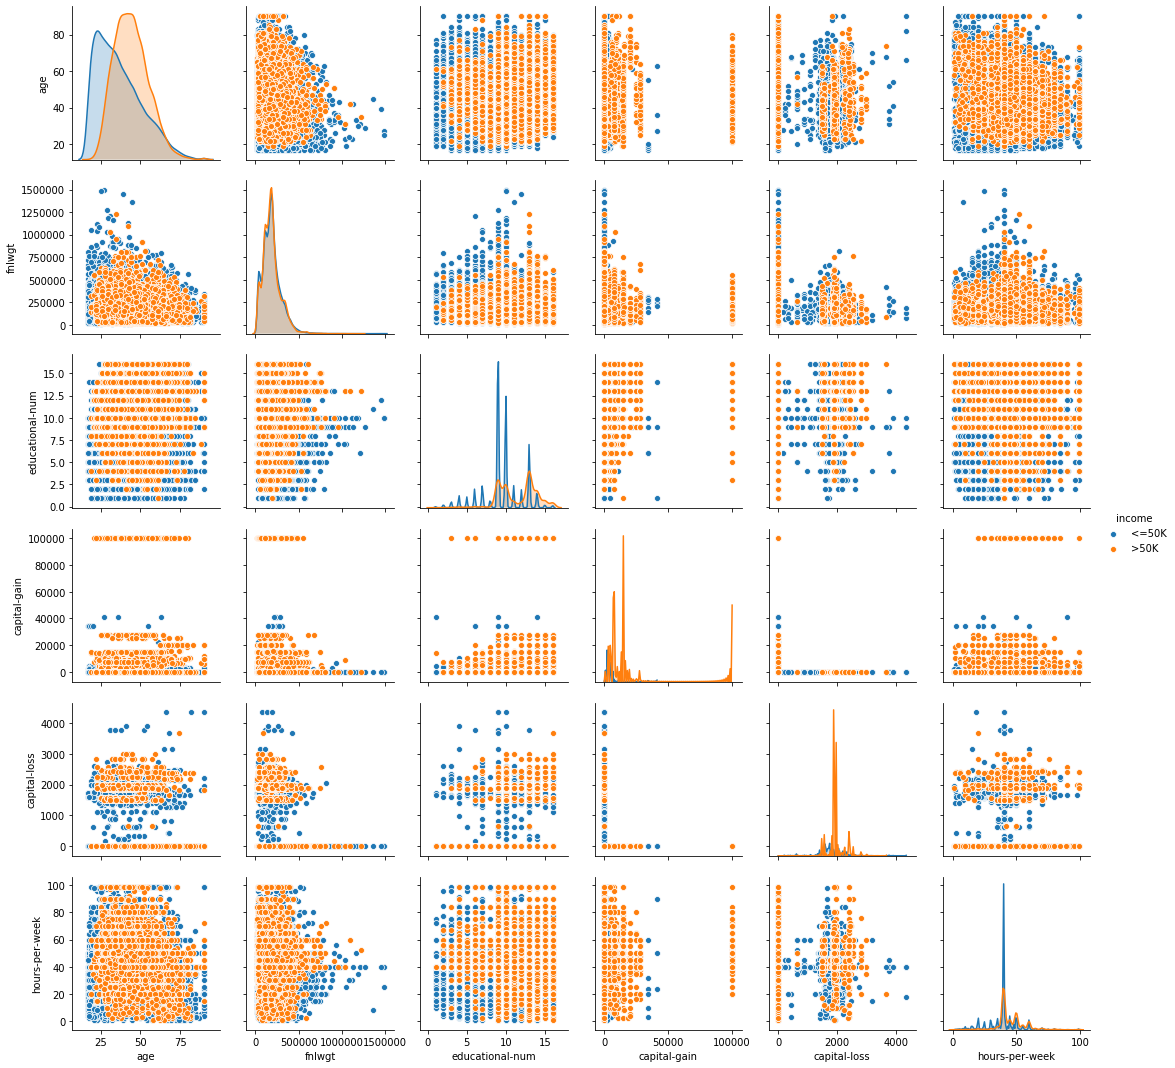

In [195]:
sns.pairplot(data, hue = "income")

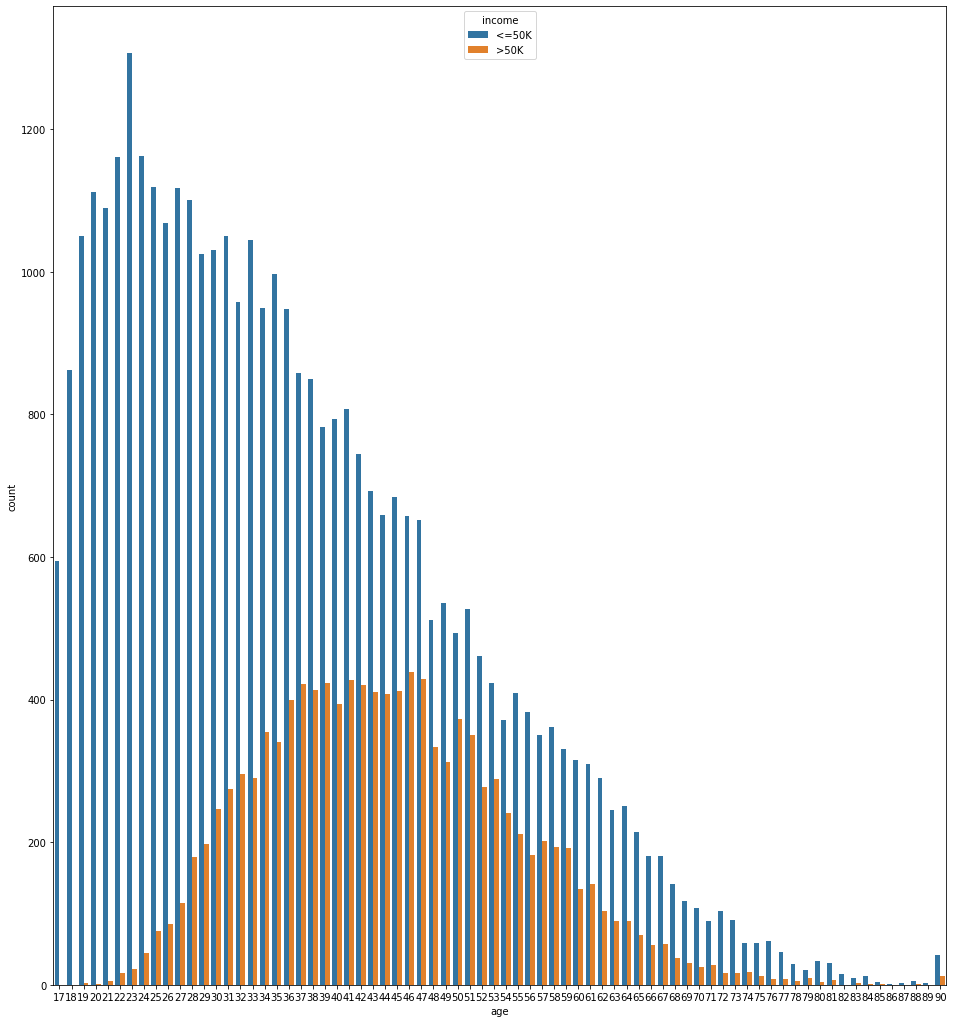

In [161]:
plt.figure(figsize = (16,18))
sns.countplot(x='age', hue='income', data=data);

In [162]:
cat_attributes = data.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [163]:
numericData = data.select_dtypes(exclude=['object'])
numericData.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


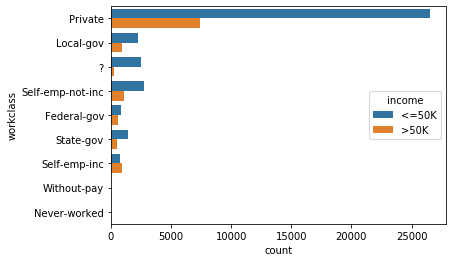

In [164]:
sns.countplot(y='workclass', hue='income', data = data)

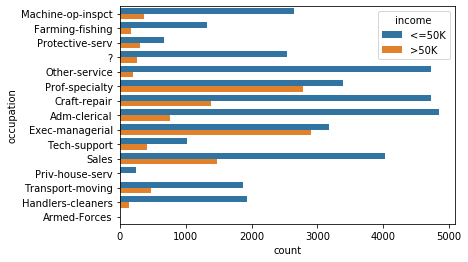

In [165]:
sns.countplot(y='occupation', hue='income', data = data)

In [166]:
#creation of copy of dataset
adult = data.copy()
# to change income to numeric
adult["income"] = adult["income"].apply(lambda x:0 if x =='<=50K' else 1)
# to delete what we do not need 
adult.drop(["fnlwgt", "education"], axis = 1, inplace = True)
adult.head(3)

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1


# Gestion des variables catégoriques

In [167]:
 adult.workclass.value_counts()


Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [168]:
 adult["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [169]:
#def gov(colums):
   # if colums  in ["Local-gov", "State-gov"]:
       # return "Governement"
    #else:
        #return colums
   

In [170]:
#adult['workclass'] = adult['workclass'].apply(gov)


In [171]:
#pd.pivot_table(adult, index='workclass')


On a netoyé les inconues pour le workclass, occupation, native-country

In [172]:
inconu = adult[[f in ['?'] for f in adult['workclass']]].index
adult.drop(inconu ,axis=0,inplace=True) 

In [173]:
inconu1 = adult[[f in ['?'] for f in adult['occupation']]].index
adult.drop(inconu1 ,axis=0,inplace=True) 

In [174]:
inconu2 = adult[[f in ['?'] for f in adult['native-country']]].index
adult.drop(inconu2 ,axis=0,inplace=True) 

In [175]:
data.shape

(48842, 15)

In [176]:
adult.shape

(45222, 13)

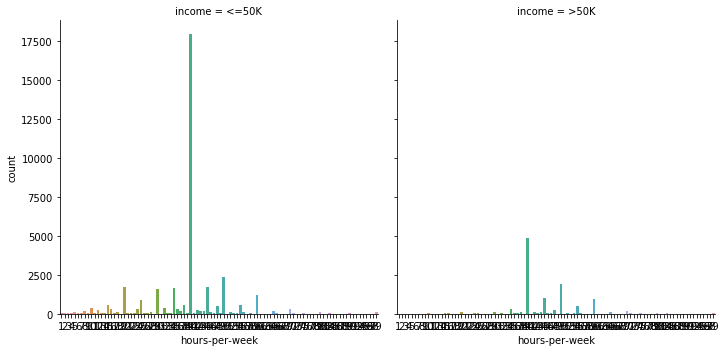

In [177]:
#hours-per-weekvs income avec catplot
sns.catplot(x='hours-per-week',col='income', data=data, kind="count");

In [178]:
adult.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [179]:
class_dum = pd.get_dummies(adult['workclass'],drop_first=True)
marital_dum = pd.get_dummies(adult['marital-status'],drop_first=True)
occupation_dum = pd.get_dummies(adult['occupation'],drop_first=True)
relationship_dum = pd.get_dummies(adult['relationship'],drop_first=True)
race_dum = pd.get_dummies(adult['race'],drop_first=True)
gender_dum = pd.get_dummies(adult['gender'],drop_first=True)
native_dum = pd.get_dummies(adult['native-country'],drop_first=True)
adult.drop(['workclass','marital-status','occupation', 'relationship', 'race', 'gender', 'native-country'],axis=1,inplace=True)


adult = pd.concat([adult, class_dum, marital_dum, occupation_dum, relationship_dum, race_dum, gender_dum,native_dum], axis = 1)
adult

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,9,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Création d'un train set et test set

In [180]:
from sklearn.model_selection import train_test_split
X = adult.drop('income',axis=1)
y = adult['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [181]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

31655 13567
31655 13567


In [182]:
X_train

,age,educational-num,capital-gain,capital-loss,hours-per-week,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
34606,28,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25976,52,10,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
21091,40,13,0,1564,60,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12919,28,11,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35237,21,9,0,0,24,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47214,25,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35107,50,10,0,0,52,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5625,20,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13141,40,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
# Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Création et entraînement du modèle

In [184]:
# Instanciation et entraînement du modèle
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression(solver='liblinear')
reglog.fit(X_train, y_train)

# Prédictions sur le test set
y_pred = reglog.predict(X_test)

In [185]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Évaluation du modèle

In [186]:
# Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.848603228421906


In [187]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10192
           1       0.73      0.61      0.67      3375

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



In [188]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[9440  752]
 [1302 2073]]


* Chaque année un individu augmente ces chances de 40 % d'appartenir à la class 1 (on regarde age et OR 1.40)
* Chaque année en formation un plus un individu augmente ces chances de 103 % d'appartenir à la class 1 (on regarde educational-num et OR 2.03)
* Un individu avec capital-gain a 8 fois/par unité plus de chances d'appartenir  a la class 1.
* Un individu né aux United-state diminue ses chances de 21%  d'appartenir  à la class 1 contrairement à un indivudu né en Yugoslavie de 0,6% (par apport le premier drop)

In [189]:
# Coefficients
coef = pd.DataFrame(np.concatenate([reglog.intercept_.reshape(-1,1), reglog.coef_],axis=1),
             index = ["Coefficients"],
             columns = ["constante"]+list(X.columns)).T

coef["OR"] = np.exp(coef.Coefficients)
coef["1/OR"] = np.exp(-coef.Coefficients)
coef

,Coefficients,OR,1/OR
constante,-1.984428,0.137459,7.274886
age,0.338665,1.403073,0.712721
educational-num,0.708367,2.030673,0.492448
capital-gain,2.269515,9.674712,0.103362
capital-loss,0.263670,1.301698,0.768227
...,...,...,...
Thailand,-0.068585,0.933714,1.070991
Trinadad&Tobago,-0.048078,0.953059,1.049253
United-States,-0.193814,0.823811,1.213871
Vietnam,-0.110566,0.895327,1.116910


In [190]:
coef.to_excel(r'data\coefRegressionLogistique.xlsx')

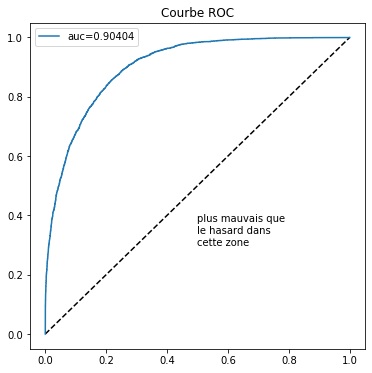

In [191]:
# Courbe ROC
from sklearn.metrics import roc_curve, auc
proba = reglog.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1], pos_label=1, drop_intermediate=False)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
# aucf = roc_auc_score(y_test == clr.classes_[0], probas[:, 0]) # première méthode
aucf = auc(fpr, tpr)  # seconde méthode
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();

In [192]:
X.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,25,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [198]:
reglog.predict([[39,14,0,0,39,0,1,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0,
                 0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,0]])

array([1])

# Validation croisée - Regression logistique

In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver = 'liblinear')
params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }

lr_gs = GridSearchCV(lr, params, cv=10)
lr_gs.fit(X_train, y_train)

print(lr_gs.best_params_)

{'C': 0.1, 'penalty': 'l1'}


In [105]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        lr_gs.cv_results_['mean_test_score'], # score moyen
        lr_gs.cv_results_['std_test_score'],  # écart-type du score
        lr_gs.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.825 (+/-0.010) for {'C': 0.001, 'penalty': 'l1'}
accuracy = 0.842 (+/-0.012) for {'C': 0.001, 'penalty': 'l2'}
accuracy = 0.848 (+/-0.011) for {'C': 0.01, 'penalty': 'l1'}
accuracy = 0.848 (+/-0.011) for {'C': 0.01, 'penalty': 'l2'}
accuracy = 0.848 (+/-0.012) for {'C': 0.1, 'penalty': 'l1'}
accuracy = 0.848 (+/-0.013) for {'C': 0.1, 'penalty': 'l2'}
accuracy = 0.848 (+/-0.012) for {'C': 1.0, 'penalty': 'l1'}
accuracy = 0.848 (+/-0.012) for {'C': 1.0, 'penalty': 'l2'}
accuracy = 0.848 (+/-0.012) for {'C': 10.0, 'penalty': 'l1'}
accuracy = 0.848 (+/-0.012) for {'C': 10.0, 'penalty': 'l2'}
accuracy = 0.848 (+/-0.012) for {'C': 100.0, 'penalty': 'l1'}
accuracy = 0.848 (+/-0.012) for {'C': 100.0, 'penalty': 'l2'}
accuracy = 0.848 (+/-0.012) for {'C': 1000.0, 'penalty': 'l1'}
accuracy = 0.848 (+/-0.012) for {'C': 1000.0, 'penalty': 'l2'}


In [109]:
# Prédictions sur le test set
y_predNew = lr_gs.predict(X_test)
print(accuracy_score(y_test,y_predNew))

0.8487506449472986


In [110]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predNew))

[[9445  747]
 [1305 2070]]


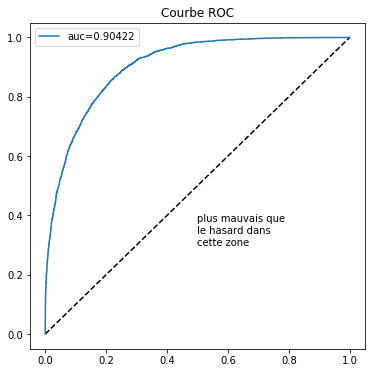

In [111]:
# Courbe ROC
from sklearn.metrics import roc_curve, auc
proba2 = lr_gs.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba2[:, 1], pos_label=1, drop_intermediate=False)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
# aucf = roc_auc_score(y_test == clr.classes_[0], probas[:, 0]) # première méthode
aucf = auc(fpr, tpr)  # seconde méthode
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();

# KNN

In [112]:
from sklearn import neighbors, metrics

In [113]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

In [114]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

In [118]:
# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

In [120]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [121]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 11}


In [122]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.819 (+/-0.008) for {'n_neighbors': 3}
accuracy = 0.825 (+/-0.007) for {'n_neighbors': 5}
accuracy = 0.829 (+/-0.009) for {'n_neighbors': 7}
accuracy = 0.830 (+/-0.006) for {'n_neighbors': 9}
accuracy = 0.832 (+/-0.007) for {'n_neighbors': 11}
accuracy = 0.831 (+/-0.006) for {'n_neighbors': 13}
accuracy = 0.831 (+/-0.007) for {'n_neighbors': 15}


In [124]:
y_pred = clf.predict(X_test)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))



Sur le jeu de test : 0.829


In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [200]:


algo = {'LR': LogisticRegression(), 
        'DT':DecisionTreeClassifier(), 
        'RFC':RandomForestClassifier(n_estimators=100), 
        'SVM':SVC(gamma=0.01),
        'KNN':KNeighborsClassifier(n_neighbors=10)
       }

for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    print('Acurracy of ' + k + ' is {0:.2f}'.format(model.score(X_test, y_test)*100))



/home/ivanka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acurracy of LR is 84.86
Acurracy of DT is 81.18
Acurracy of RFC is 84.31
Acurracy of SVM is 84.62
Acurracy of KNN is 83.05
